In [193]:
from qaoa_vrp.generators.random_instances import *
from qaoa_vrp.generators.generator_utils import *
from qaoa_vrp.features.graph_features import get_graph_features
import json

In [194]:
NUM_VEHICLES = 2
NUM_CITIES = 7
cluster_mapping = [0 for i in range(NUM_CITIES)]
cluster_mapping[0] = 1

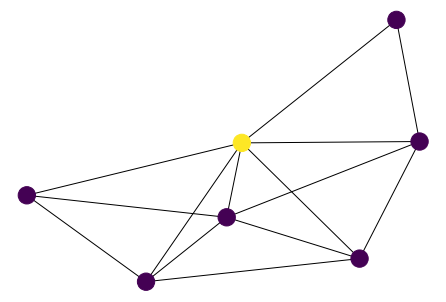

In [195]:
G = generate_random_instance(NUM_CITIES,num_vehicles=NUM_VEHICLES, instance_type="watts_strogatz")
instance_json = instance_constructor(G,num_vehicles=NUM_VEHICLES, threshold=1, n_max=10, p_max=1, instance_type='watts_strogatz')
nx.draw(G, node_color = cluster_mapping)

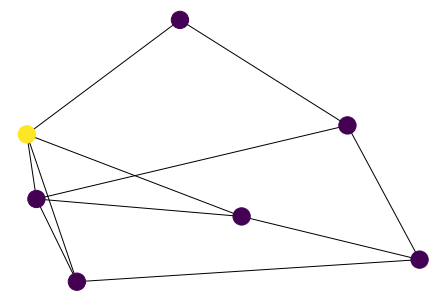

In [196]:
G = generate_random_instance(NUM_CITIES,num_vehicles=NUM_VEHICLES, instance_type="newman_watts_strogatz")
instance_json = instance_constructor(G,num_vehicles=NUM_VEHICLES, threshold=1, n_max=10, p_max=1, instance_type='complete')
nx.draw(G, node_color=cluster_mapping)

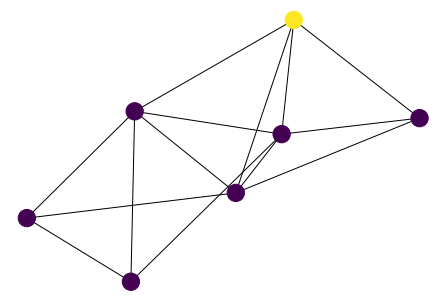

In [197]:
G = generate_random_instance(NUM_CITIES,num_vehicles=NUM_VEHICLES, instance_type="watts_strogatz")
instance_json = instance_constructor(G,num_vehicles=NUM_VEHICLES, threshold=1, n_max=10, p_max=1, instance_type='watts_strogatz')
nx.draw(G, node_color=cluster_mapping)

In [198]:
G.graph['instance_type'] = 'watts_strogatz'
G.graph['num_vehicles'] = NUM_VEHICLES
G.graph['num_cities'] = NUM_CITIES
G.graph['graph_features'] = get_graph_features(G)

In [199]:
tsp_features = {}

In [200]:
adj = nx.adjacency_matrix(G, weight='cost')
shortest1 = nx.shortest_path_length(G, weight="cost")
shortest2 = dict(shortest1)
ecc = nx.eccentricity(G, sp=shortest2)

In [202]:
# Find Nearest Neighbours
nearest_neighbours = np.asarray([min([edge[2]['cost'] for edge in G.edges(node, data=True)]) for node in G.nodes])
normalised_nearest_neighbours = nearest_neighbours/np.sqrt(np.sum(nearest_neighbours**2))
normalised_nearest_neighbours


array([0.4116657 , 0.4116657 , 0.60124859, 0.04333323, 0.04333323,
       0.38458243, 0.38458243])

In [203]:
# Fraction of distinct distances
cost_one_dp = [np.round(edge[2]['cost'],1) for edge in G.edges(data=True)]

In [204]:
tsp_features['nnd_var'] = np.var(normalised_nearest_neighbours)
tsp_features['nnd_coefficient_var'] = 100*(np.std(normalised_nearest_neighbours)/np.mean(normalised_nearest_neighbours))
tsp_features['radius'] = nx.algorithms.distance_measures.radius(G, e=ecc)
tsp_features['mean'] = np.mean(adj)
tsp_features['std'] = np.std(nx.to_numpy_matrix(G, weight='cost'))
tsp_features['frac_distinct_dist_one_dp'] = len(set(cost_one_dp))/len(cost_one_dp)
tsp_features['clustering_coeff_variance'] = np.var([item[1] for item in nx.clustering(G).items()])

In [205]:
G.graph['tsp_features'] = tsp_features

In [210]:
G